<a href="https://colab.research.google.com/github/magaramol/Social-Network-Graph-Link-Prediction/blob/main/Link_Prediction_in_Social_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
# please do go through this python notebook:
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle

In [2]:
# this is test for git

In [ ]:
#reading graph
if not os.path.isfile('/content/drive/MyDrive/colab/FB/data/after_eda/train_woheader.csv'):
    traincsv = pd.read_csv('/content/drive/MyDrive/colab/FB/data/train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of diplicate entries: ",sum(traincsv.duplicated()))
    traincsv.to_csv('fter_eda/train_woheader.csv',header=False,index=False)
    print("saved the graph into file")
else:
    g=nx.read_edgelist('/content/drive/MyDrive/colab/FB/data/after_eda/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    #print(nx.info(g))

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/colab/FB/data/train.csv',header=None,skiprows=[0])

In [ ]:
g = nx.from_pandas_edgelist(df, source=0, target=1, create_using=nx.DiGraph())
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
avg_in_degree = sum(dict(g.in_degree()).values()) / len(g)
avg_out_degree = sum(dict(g.out_degree()).values()) / len(g)

print("Average in-degree:", "{:.4f}".format(avg_in_degree))
print("Average out-degree:", "{:.4f}".format(avg_out_degree))

Number of nodes: 1862220
Number of edges: 9437519
Average in-degree: 5.0679
Average out-degree: 5.0679


In [ ]:
sampled_df = df.sample(n=30, random_state=42)

Number of nodes: 60
Number of edges: 30
Average in-degree: 0.5
Average out-degree: 0.5


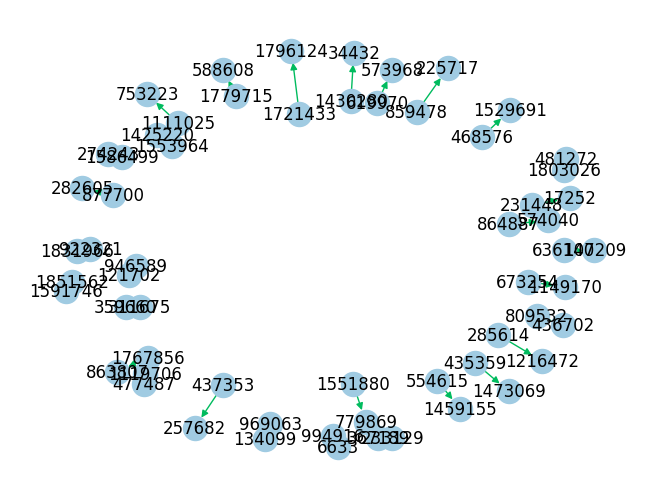

In [ ]:

# Convert the sampled DataFrame to an edge list
edges = sampled_df.values.tolist()

# Create a subgraph from the edge list
subgraph = nx.DiGraph(edges)

# Print basic information about the subgraph
print("Number of nodes:", subgraph.number_of_nodes())
print("Number of edges:", subgraph.number_of_edges())

# Calculate and print the average in-degree and average out-degree
avg_in_degree = sum(dict(subgraph.in_degree()).values()) / subgraph.number_of_nodes()
avg_out_degree = sum(dict(subgraph.out_degree()).values()) / subgraph.number_of_nodes()
print("Average in-degree:", round(avg_in_degree, 4))
print("Average out-degree:", round(avg_out_degree, 4))

# Draw the subgraph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_color='#A0CBE2', edge_color='#00bb5e', width=1, edge_cmap=plt.cm.Blues, with_labels=True)
plt.savefig("graph_sample.pdf")
plt.show()



In [ ]:
# number of unique persons
print("The number of uniqur persons are:", len(g.nodes()))

The number of uniqur persons are: 1862220


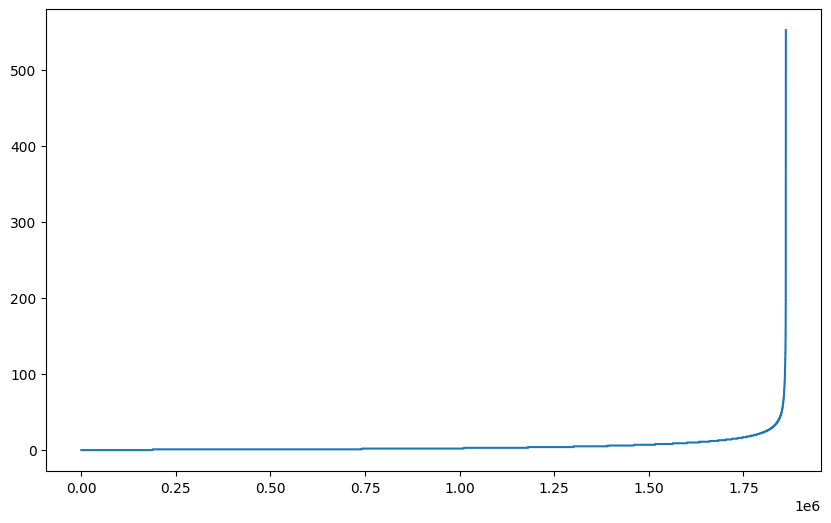

In [ ]:
indegree_ls=list(dict(g.in_degree()).values())
indegree_ls.sort()
plt.figure(figsize=(10,6))

plt.plot(indegree_ls)
plt.show()

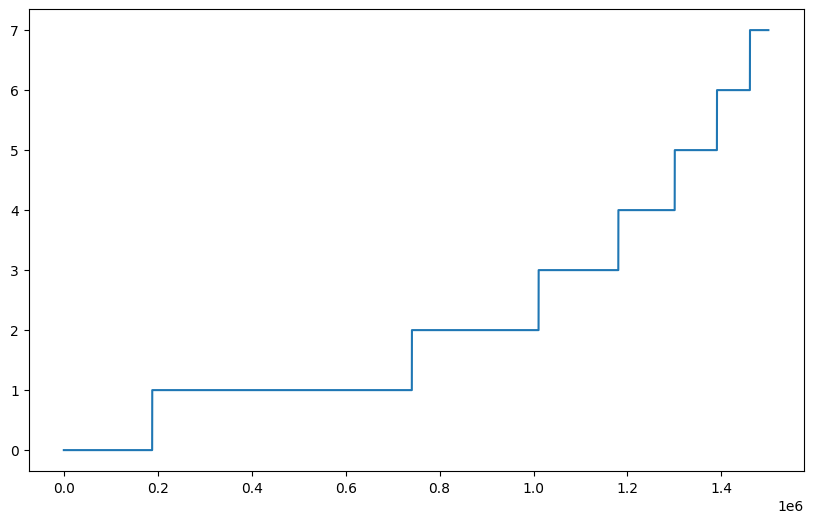

In [ ]:
indegree_ls=list(dict(g.in_degree()).values())
indegree_ls.sort()
plt.figure(figsize=(10,6))

plt.plot(indegree_ls[0:1500000])
plt.show()

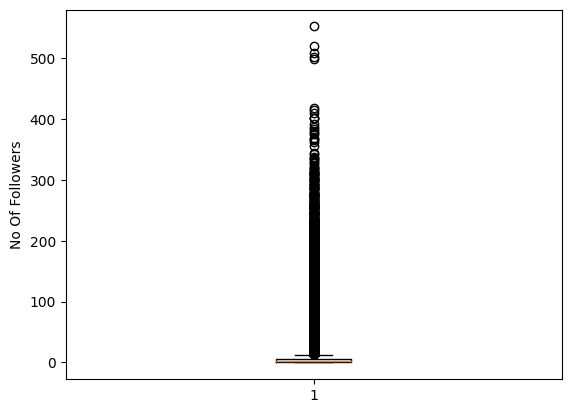

In [ ]:
plt.boxplot(indegree_ls)
plt.ylabel('No Of Followers')
plt.show()

In [ ]:
for i in range(0,11):
    print(90+i,'percentile value is ',np.percentile(indegree_ls,90+i))

90 percentile value is  12.0
91 percentile value is  13.0
92 percentile value is  14.0
93 percentile value is  15.0
94 percentile value is  17.0
95 percentile value is  19.0
96 percentile value is  21.0
97 percentile value is  24.0
98 percentile value is  29.0
99 percentile value is  40.0
100 percentile value is  552.0


In [ ]:
for i in range(10,110,10):
    print(99+(i/100),'percentile value is ',np.percentile(indegree_ls,99+(i/100)))

99.1 percentile value is  42.0
99.2 percentile value is  44.0
99.3 percentile value is  47.0
99.4 percentile value is  50.0
99.5 percentile value is  55.0
99.6 percentile value is  61.0
99.7 percentile value is  70.0
99.8 percentile value is  84.0
99.9 percentile value is  112.0
100.0 percentile value is  552.0


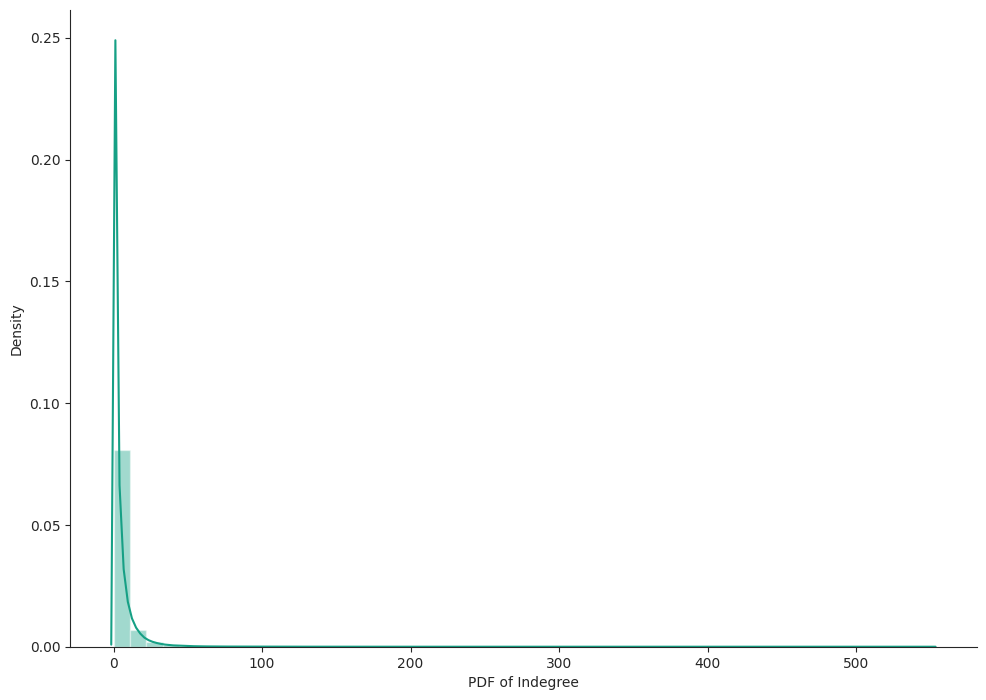

In [ ]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_ls, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

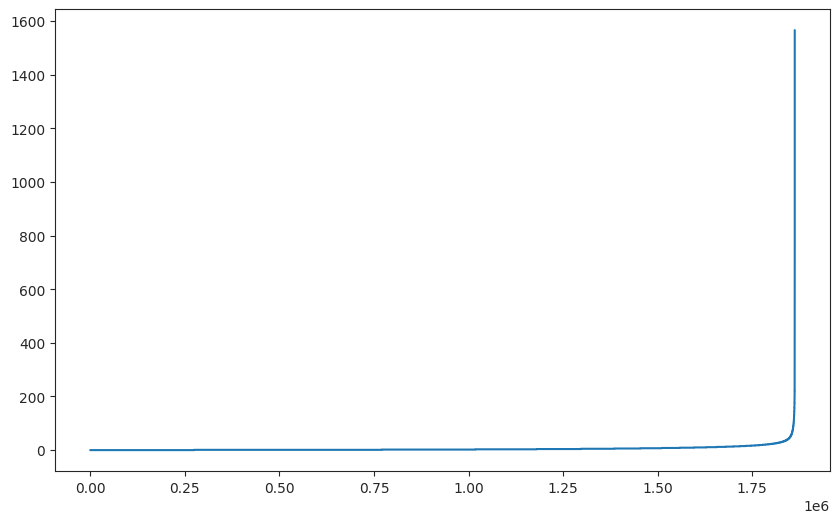

In [ ]:
out_degree_ls=list(dict(g.out_degree()).values())
out_degree_ls.sort()
plt.figure(figsize=(10,6))

plt.plot(out_degree_ls)
plt.show()

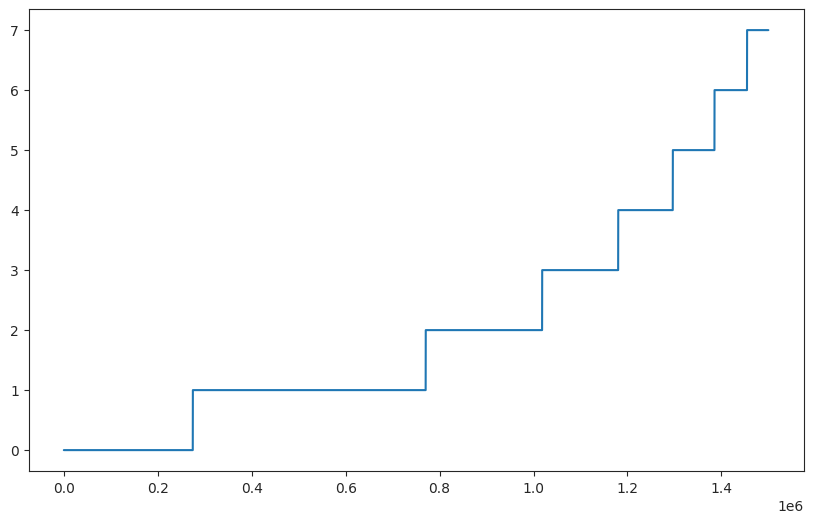

In [ ]:
out_degree_ls=list(dict(g.out_degree()).values())
out_degree_ls.sort()
plt.figure(figsize=(10,6))

plt.plot(out_degree_ls[0:1500000])
plt.show()

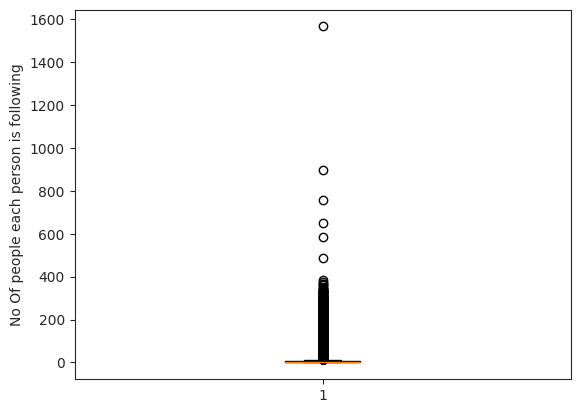

In [ ]:
plt.boxplot(out_degree_ls)
plt.ylabel('No Of people each person is following')
plt.show()

In [ ]:
for i in range(0,11):
    print(90+i,'percentile value is ',np.percentile(out_degree_ls,90+i))

90 percentile value is  12.0
91 percentile value is  13.0
92 percentile value is  14.0
93 percentile value is  15.0
94 percentile value is  17.0
95 percentile value is  19.0
96 percentile value is  21.0
97 percentile value is  24.0
98 percentile value is  29.0
99 percentile value is  40.0
100 percentile value is  1566.0


In [ ]:
for i in range(10,110,10):
    print(99+(i/100),'percentile value is ',np.percentile(out_degree_ls,99+(i/100)))

99.1 percentile value is  42.0
99.2 percentile value is  45.0
99.3 percentile value is  48.0
99.4 percentile value is  52.0
99.5 percentile value is  56.0
99.6 percentile value is  63.0
99.7 percentile value is  73.0
99.8 percentile value is  90.0
99.9 percentile value is  123.0
100.0 percentile value is  1566.0


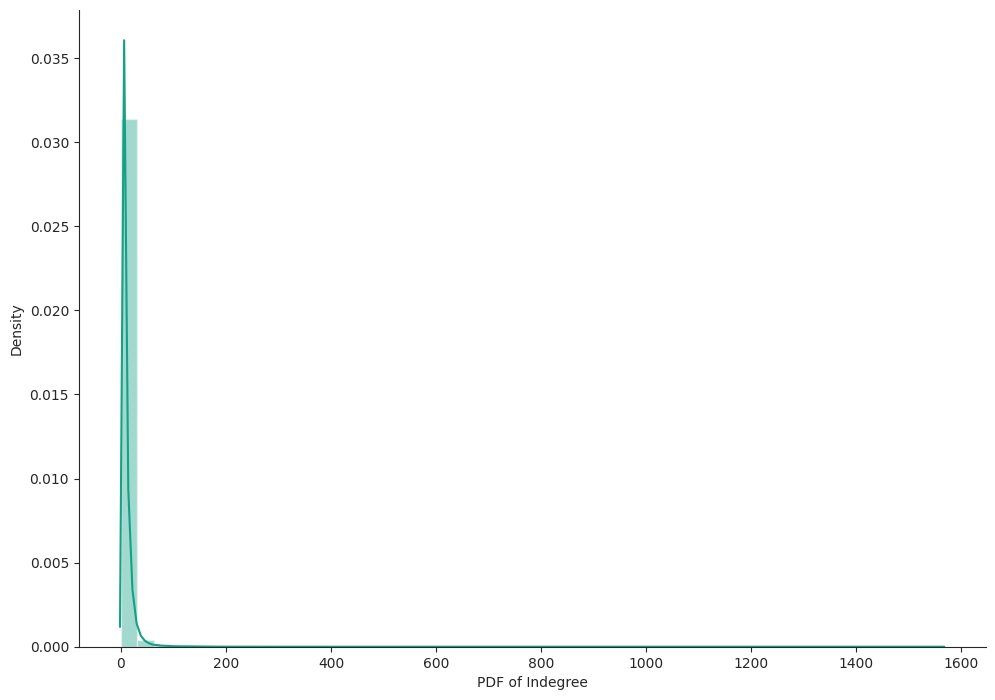

In [ ]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(out_degree_ls, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
#plt.show()

In [ ]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

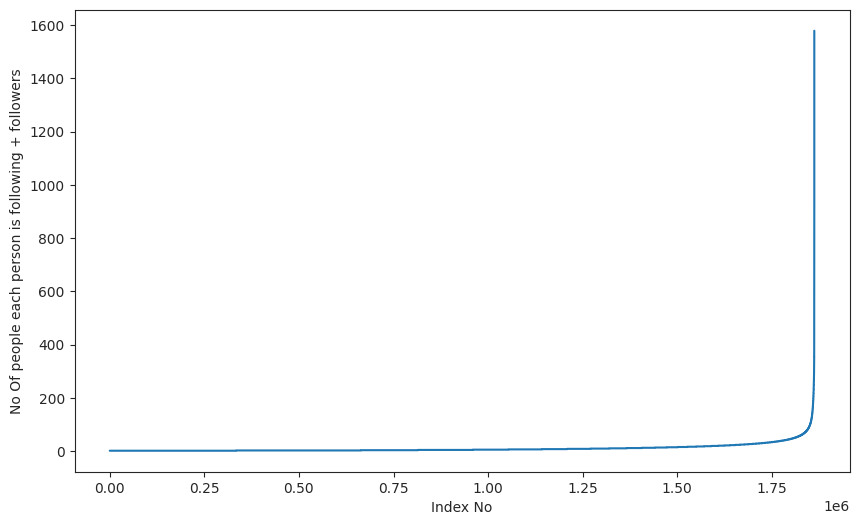

In [ ]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

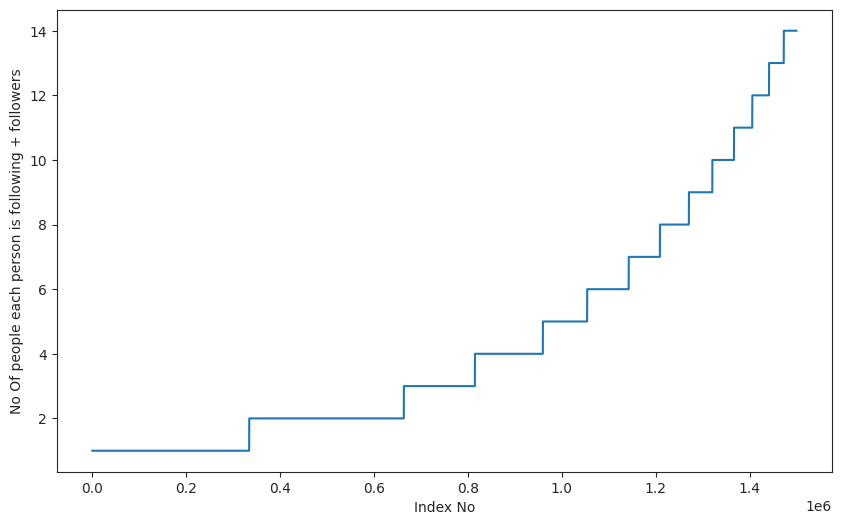

In [ ]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [ ]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [ ]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [ ]:
%%time
###generating bad edges from given graph
import random
if not os.path.isfile('/content/drive/MyDrive/colab/FB/data/after_eda/missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('/content/drive/MyDrive/colab/FB/data/after_eda/train_woheader.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1


    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2:

                    missing_edges.add((a,b))
                else:
                    continue
            except:
                    missing_edges.add((a,b))
        else:
            continue
    pickle.dump(missing_edges,open('/content/drive/MyDrive/colab/FB/data/after_eda/missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('/content/drive/MyDrive/colab/FB/data/after_eda/missing_edges_final.p','rb'))

CPU times: user 3.32 s, sys: 1.71 s, total: 5.03 s
Wall time: 18.5 s


In [ ]:
len(missing_edges)

9437519

In [ ]:
df_pos=pd.read_csv('/content/drive/MyDrive/colab/FB/data/train.csv')
df_neg=pd.DataFrame(list(missing_edges),columns=['source_node','destination_node'])
print('number of nodes in the graph with edges',df_pos.shape[0])
print('number of nodes in the graph without edges',df_neg.shape[0])



number of nodes in the graph with edges 9437519
number of nodes in the graph without edges 9437519


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)


In [ ]:
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])

print('='*60)

print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=", y_test_neg.shape[0])


Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


In [ ]:
X_train_pos.to_csv('train_pos_after_eda.csv',header=False, index=False)
X_test_pos.to_csv('test_pos_after_eda.csv',header=False, index=False)
X_train_neg.to_csv('train_neg_after_eda.csv',header=False, index=False)
X_test_neg.to_csv('test_neg_after_eda.csv',header=False, index=False)


In [ ]:
X_train = pd.concat([X_train_pos, X_train_neg], ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = pd.concat([X_test_pos, X_test_neg], ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg))


In [ ]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)


In [ ]:
## feat

In [ ]:
#train_pos_after_eda /content/test_neg_after_eda.csv

In [ ]:
train_graph=nx.read_edgelist('/content/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
#print(nx.info(train_graph))

In [ ]:
print("Number of nodes:", train_graph.number_of_nodes())
print("Number of edges:", train_graph.number_of_edges())



avg_in_degree = sum(dict(train_graph.in_degree()).values()) / len(g)
avg_out_degree = sum(dict(train_graph.out_degree()).values()) / len(g)

print("Average in-degree:", "{:.4f}".format(avg_in_degree))
print("Average out-degree:", "{:.4f}".format(avg_out_degree))

Number of nodes: 1780722
Number of edges: 7550015
Average in-degree: 4.0543
Average out-degree: 4.0543


In [ ]:
print(type(train_graph))

<class 'networkx.classes.digraph.DiGraph'>
